In [2]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *



In [4]:
res = models.densenet169
#hyperparameters
batch_size = 10
epochs = 50
#lr = 0.01 #you can set a specific learning rate or just let it perform cyclic training

#Storing path
save_loc = 'densenet169model_trainedonSIPAKMEDdataset5000' + str(epochs) + "batch" + str(batch_size)

## Declaring path of dataset
path_img = Path("SIPakMed_format_unaugumented")

#Declaring the .pth path for the model weights
weights_path = path_img/'models'/"densenet16modeltrainedon_DA_HERLEV_SIPAKMED95accuracy"/"densenet169model_trainedonExtendedDAdataset50batch100.001BEST"  #this needs to be of .pth extension

#Model path (.pkl) to the folder with the "export.pkl" seraialization file
model_path = path_img/'models'/"densenet169SimplesipakmedE10B5accuracy87"   #this needs to be of .pkl extension and it needs to have the name "export.pkl"
## Loading data 
data = ImageDataBunch.from_folder(path=path_img, train='train',
            valid='val', ds_tfms=get_transforms(), size = 224, bs=batch_size)#, check_ext=False)  #the size of the input pictures is quite important
## Normalizing data based on Image net parameters
data.normalize(imagenet_stats)
#data.show_batch(rows=3, figsize=(10,8))
print(data.classes)
len(data.classes),data.c

d:\major_project\env_major_project\lib\site-packages\torch\nn\functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
d:\major_project\env_major_project\lib\site-packages\torch\nn\functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The de

['im_Dyskeratotic', 'im_Koilocytotic', 'im_Metaplastic', 'im_Parabasal', 'im_Superficial-Intermediate']


d:\major_project\env_major_project\lib\site-packages\torch\nn\functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


(5, 5)

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to C:\Users\Aditya Arora/.cache\torch\hub\checkpoints\densenet169-b2777c0a.pth


  0%|          | 0.00/54.7M [00:00<?, ?B/s]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.737361,0.762407,0.762887,0.759325,04:57
1,1.186406,0.525893,0.824742,0.823103,04:41
2,0.943173,0.487584,0.819588,0.814874,04:36
3,0.739369,0.453288,0.871134,0.870440,04:31
4,0.653572,0.441688,0.886598,0.885843,04:37
5,0.643252,0.664235,0.829897,0.826614,04:30
6,0.634120,0.422820,0.902062,0.901610,04:30
7,0.563504,0.512342,0.871134,0.869940,04:31
8,0.632971,0.404854,0.865979,0.865035,04:27
9,0.603115,0.391642,0.902062,0.900916,04:30


Better model found at epoch 0 with accuracy value: 0.7628865838050842.
Better model found at epoch 1 with accuracy value: 0.8247422575950623.
Better model found at epoch 3 with accuracy value: 0.8711340427398682.
Better model found at epoch 4 with accuracy value: 0.8865979313850403.
Better model found at epoch 6 with accuracy value: 0.9020618796348572.
Better model found at epoch 12 with accuracy value: 0.907216489315033.
Better model found at epoch 20 with accuracy value: 0.938144326210022.
Better model found at epoch 34 with accuracy value: 0.9484536051750183.


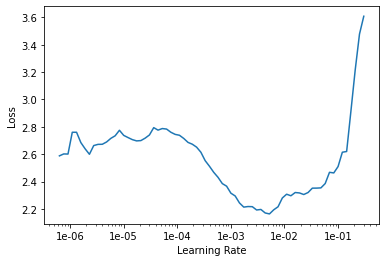

In [5]:

defaults.device = torch.device('cuda')
trans_model= cnn_learner(data, models.densenet169, metrics=[accuracy,FBeta(average="weighted")])

trans_model.unfreeze()
trans_model.lr_find()
trans_model.recorder.plot()
trans_model.fit_one_cycle(epochs,callbacks=[SaveModelCallback(trans_model, every='improvement', mode = 'max', monitor='accuracy', name=save_loc)])

trans_model.save(save_loc)
trans_model.export()